<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Import all Necessary Libraries</b></p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Import  Datasets</b></p>


In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Data Overview</b></p>

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.shape

(891, 12)

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Exploratory Data Analysis</b></p>

In [7]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

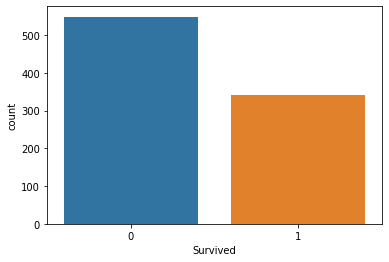

In [8]:
sns.countplot(data=df_train, x='Survived')

<AxesSubplot:>

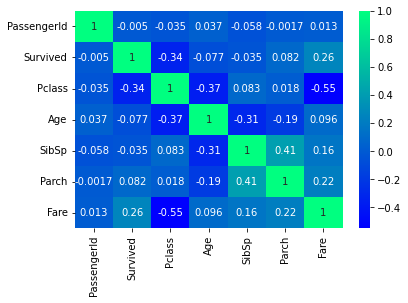

In [9]:
sns.heatmap(df_train.corr(), annot=True,cmap='winter')

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Data preparation
</b></p>

In [10]:
((df_train.isnull().sum())/len(df_train))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
df_train.drop('Cabin',axis=1,inplace=True)

In [12]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)

In [13]:
((df_train.isnull().sum())/len(df_train))*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [16]:
nan_percent= missing_percent(df_train)


In [17]:
nan_percent

Embarked    0.224467
dtype: float64

In [18]:
df_train.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)

In [19]:
df_train.loc[df_train['Sex']=='male','Sex']=1
df_train.loc[df_train['Sex']=='female','Sex']=0

In [20]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [21]:
nan_percent= missing_percent(df_train)

In [22]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [23]:
nan_percent

Series([], dtype: float64)

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b> Now, we don't have any Missing Data.
</b></p>

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b> Features & Label
</b></p>

In [24]:
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b> Scalling The Features
</b></p>

In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [27]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b> Build the model
</b></p>

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Predicting Test Data</b></p>

In [31]:
y_pred = model.predict(X_test)

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Evaluate model</b></p>

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
confusion_matrix(y_test,y_pred)

array([[48,  3],
       [14, 25]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



In [35]:
model.feature_importances_

array([0.13935582, 0.37852282, 0.33765279, 0.09502688, 0.04944169])

In [36]:
pd.DataFrame(index=X_train.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Pclass,0.139356
Sex,0.378523
Age,0.337653
SibSp,0.095027
Parch,0.049442


<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Visualize the Tree</b></p>

In [37]:
from sklearn.tree import plot_tree

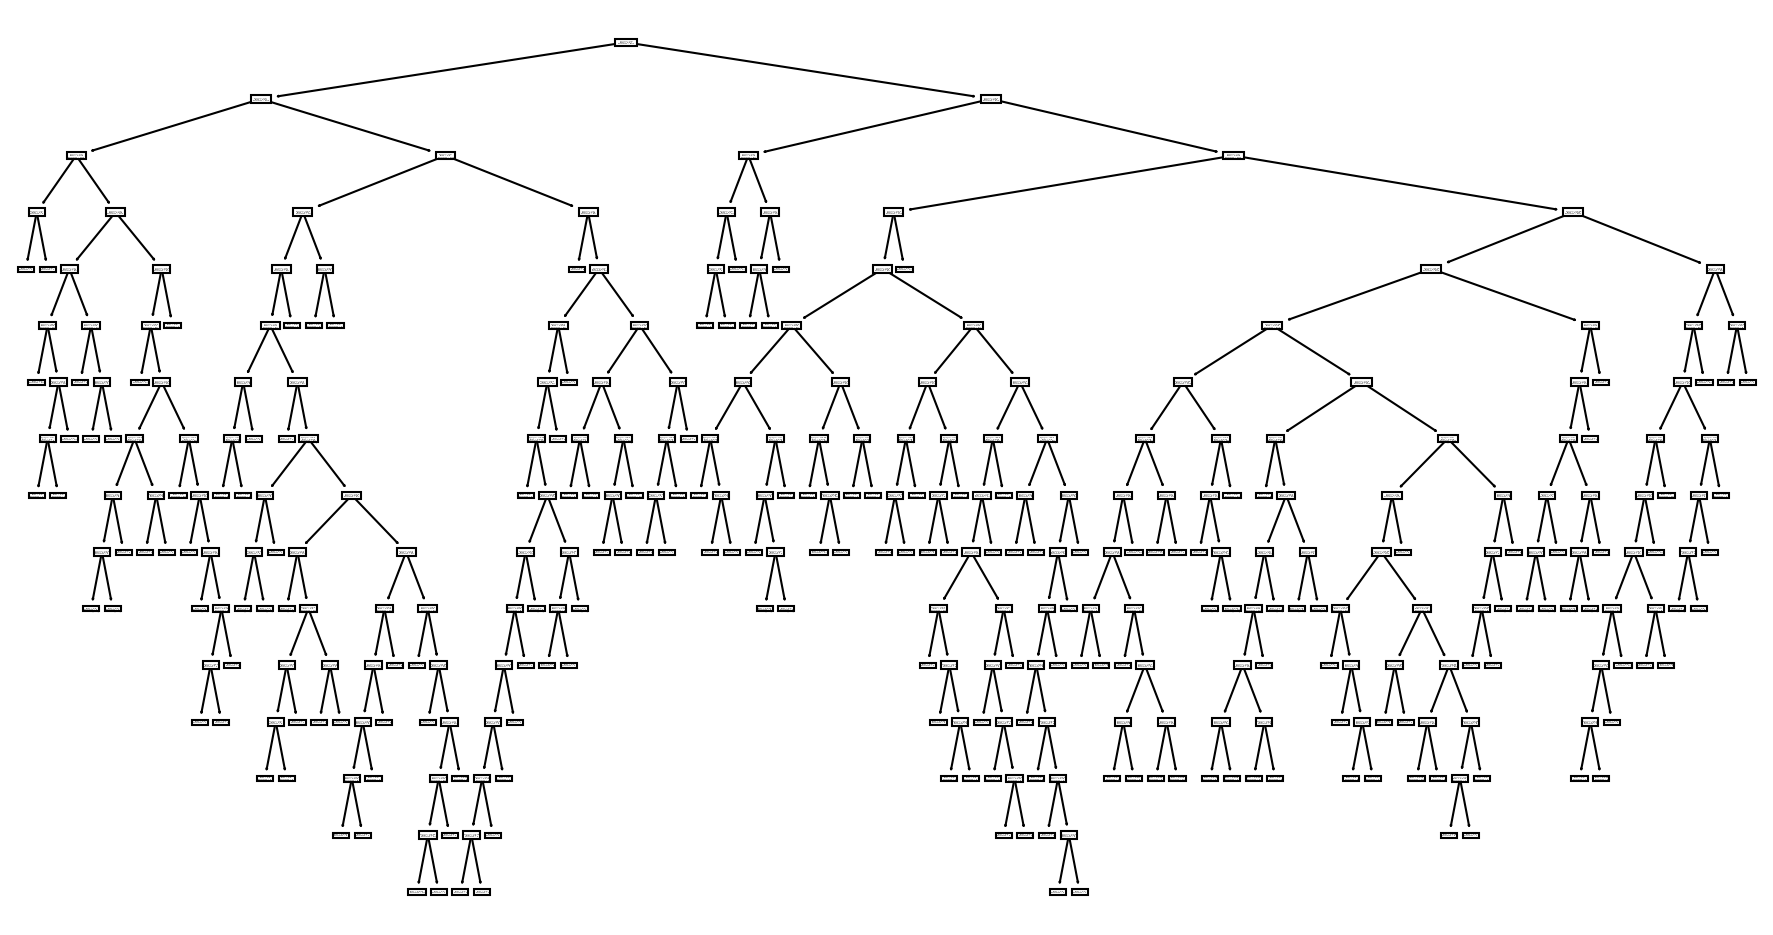

In [38]:
plt.figure(figsize=(15,8),dpi=150)
plot_tree(model);

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Reporting Model Results</b></p>

In [39]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X_test.columns);

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Understanding Hyperparameters</b></p>

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Max Depth</b></p>

In [40]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [41]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        51
           1       0.81      0.44      0.57        39

    accuracy                           0.71        90
   macro avg       0.75      0.68      0.68        90
weighted avg       0.74      0.71      0.69        90





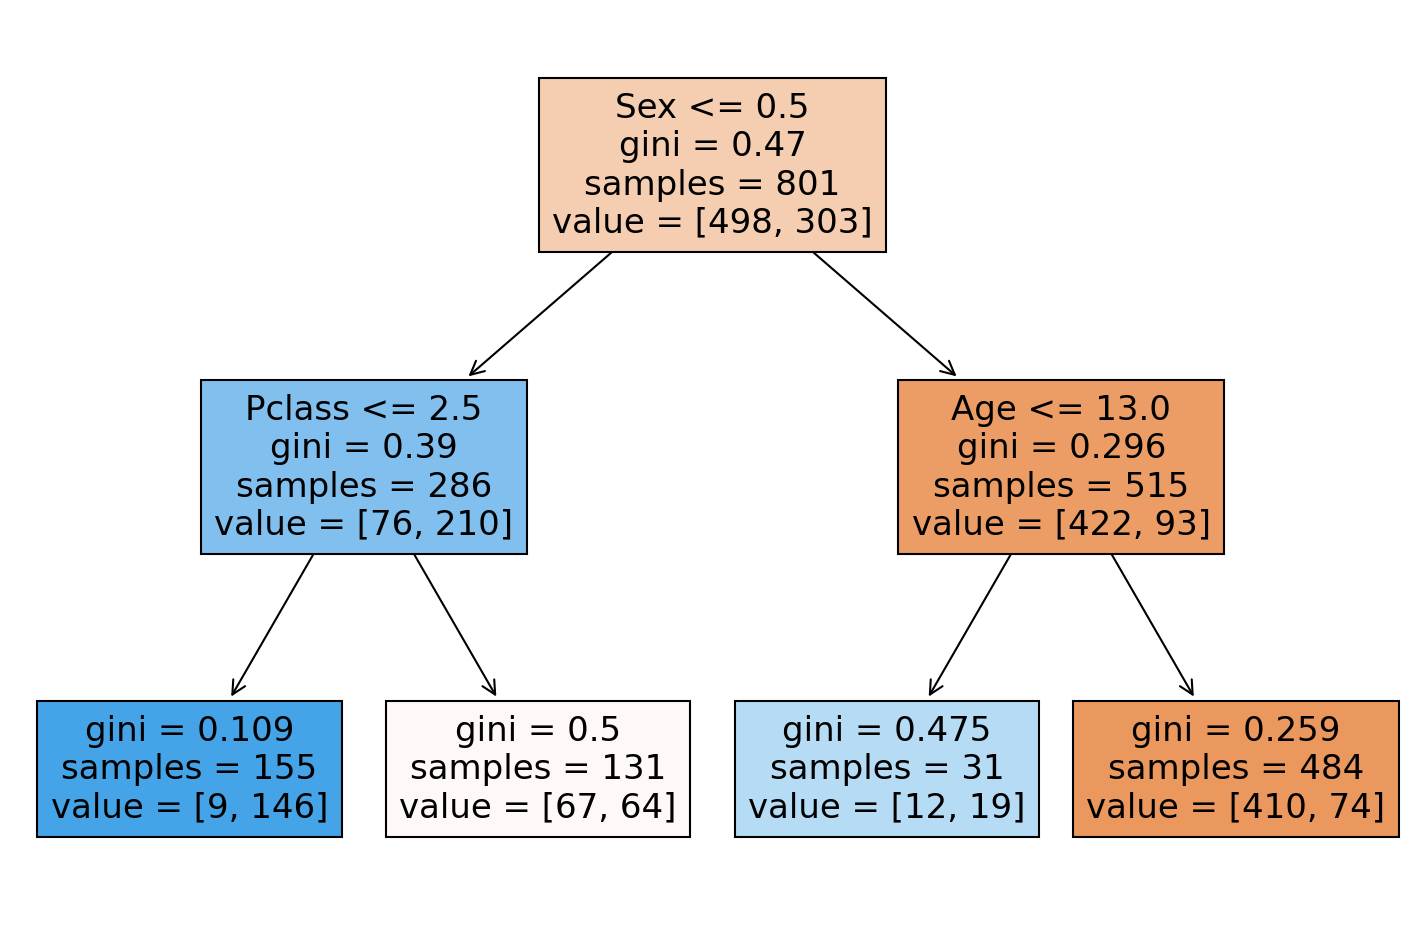

In [42]:
report_model(pruned_tree)

<p style = "font-size : 25px; color : #0909FF; font-family : 'fantasy'; "><b>Max Leaf Nodes</b></p>

In [43]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        51
           1       1.00      0.38      0.56        39

    accuracy                           0.73        90
   macro avg       0.84      0.69      0.68        90
weighted avg       0.82      0.73      0.70        90





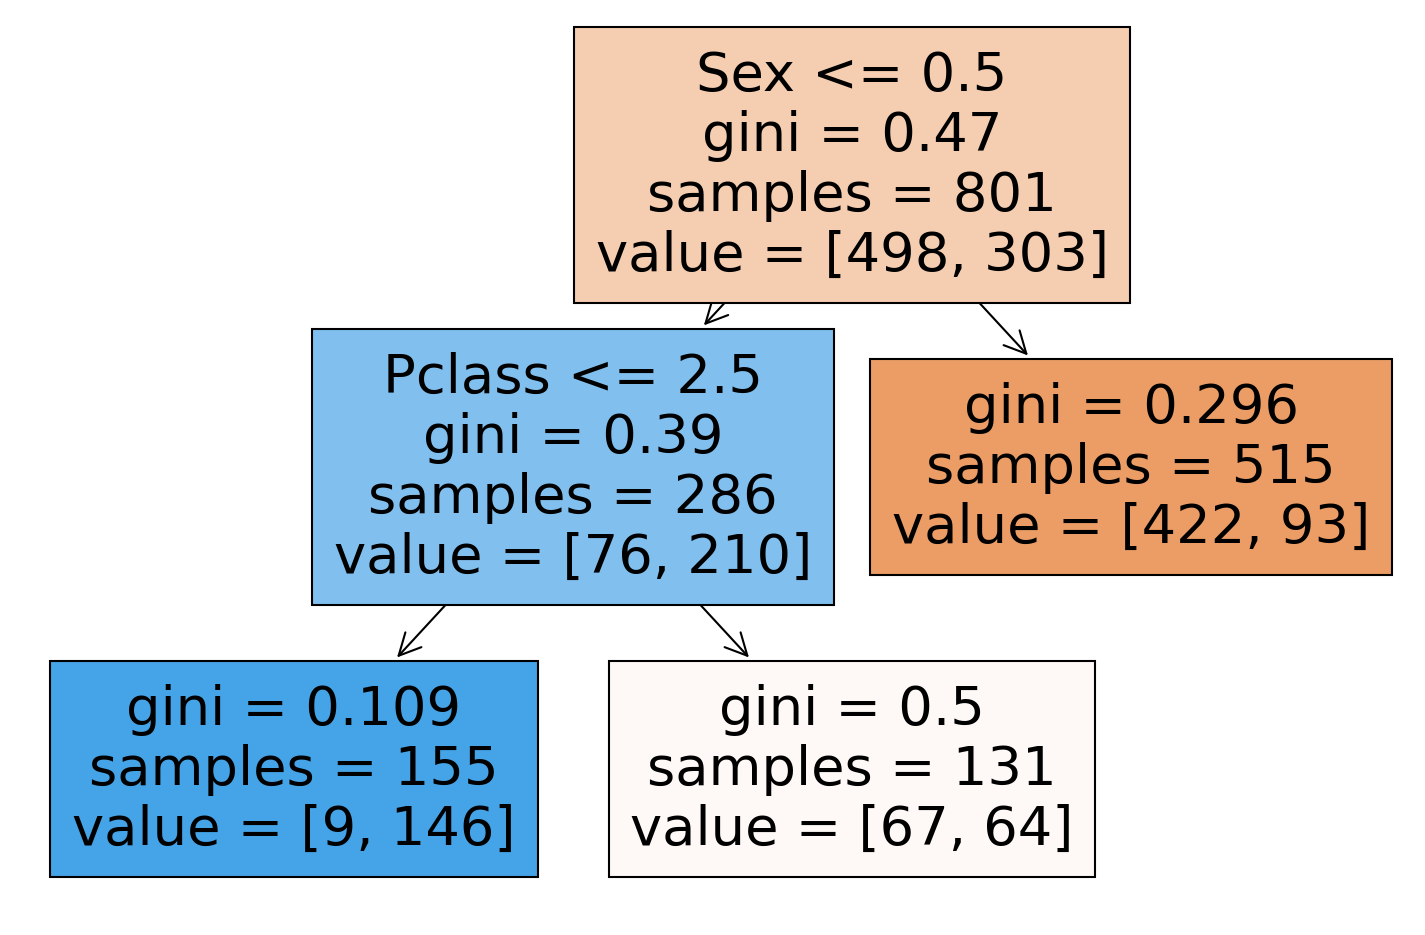

In [44]:
report_model(pruned_tree)

<p style = "font-size : 25px; color : #0909FF ; font-family : 'fantasy'; "><b>Criterion</b></p>

In [45]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

    accuracy                           0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90





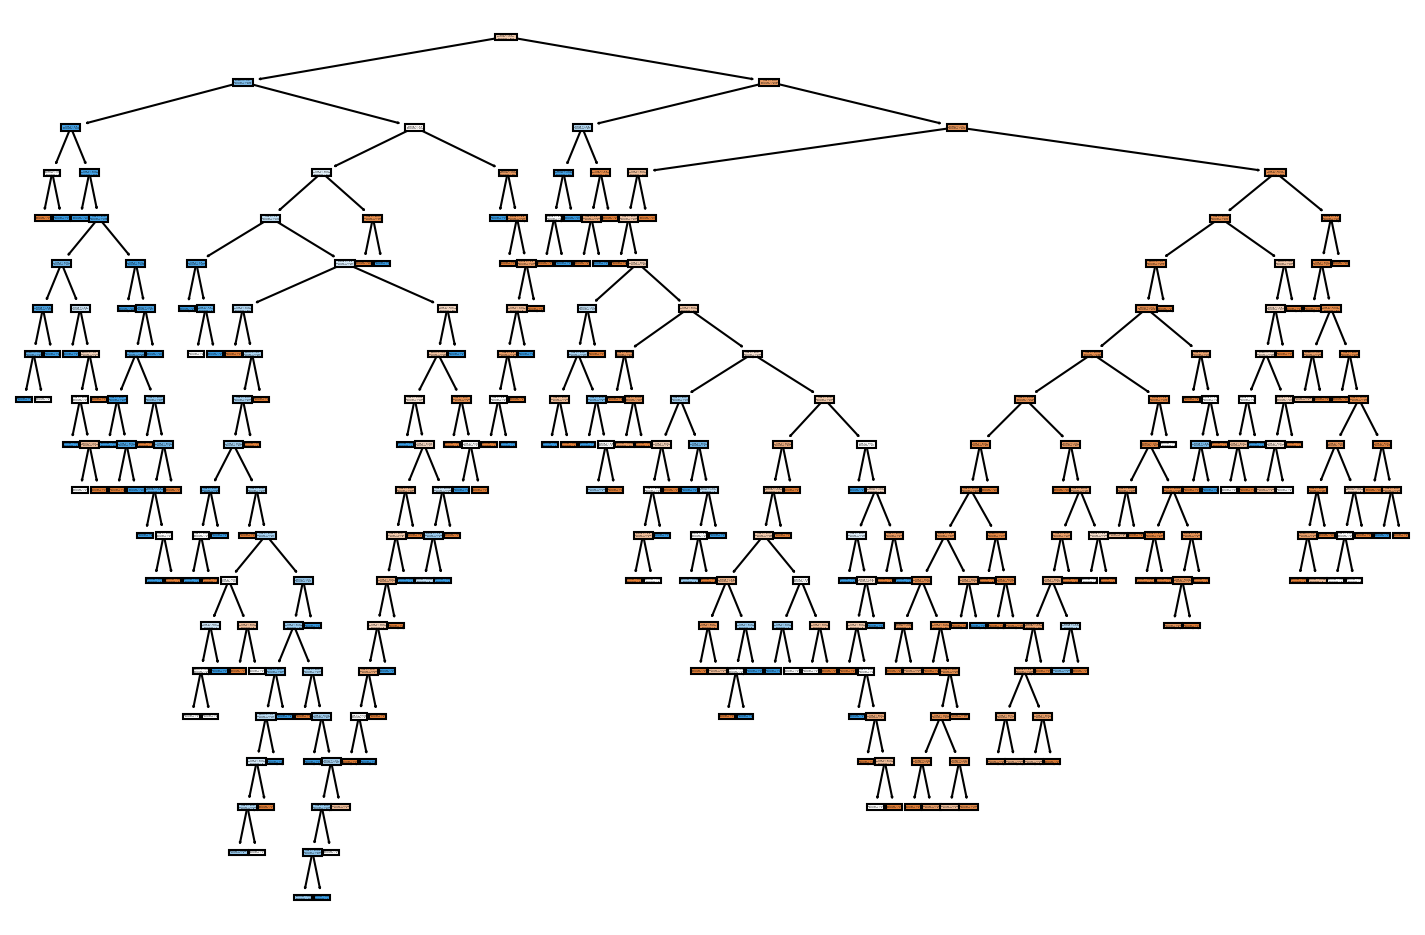

In [46]:
report_model(entropy_tree)